### features:
* selected spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet of level 0

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
import itertools

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
csv_path = "/Users/ecem/Desktop/csv of scgs"
wavelet_csv = "/Users/ecem/Desktop/wavelet-csv"

## Load data

Here, our target is to predict disease correctly. So; our y will be disease column of  dataset

## Training data

In [4]:
spec_t = pd.read_csv(csv_path + '/spectogram_coef.csv', index_col = 0).drop(['disease'], axis =1)
#spec  #uncomment to see dataframe

signal_proc_t = pd.read_csv(csv_path + '/signal_processing.csv', index_col = 0)
labels = signal_proc_t.disease
signal_proc_t = signal_proc_t.drop(['disease'], axis = 1)

w_lvl0_t = pd.read_csv(wavelet_csv + '/wavelet_lvl0.csv', index_col = 0).drop(['disease'], axis =1)

In [5]:
spec_t

,freq_x0,freq_y0,freq_z0,freq_x1,freq_y1,freq_z1,freq_x2,freq_y2,freq_z2,freq_x3,...,freq_z2044,freq_x2045,freq_y2045,freq_z2045,freq_x2046,freq_y2046,freq_z2046,freq_x2047,freq_y2047,freq_z2047
0,0.000462,0.000658,0.000667,0.000676,0.000683,0.000685,0.000687,0.000686,0.000687,0.000691,...,0.004169,0.004046,0.003889,0.003707,0.003516,0.003316,0.003111,0.002911,0.002730,0.002589
1,0.000359,0.000513,0.000522,0.000531,0.000538,0.000542,0.000546,0.000552,0.000559,0.000569,...,0.002818,0.002766,0.002698,0.002611,0.002504,0.002379,0.002240,0.002093,0.001949,0.001826
2,0.000467,0.000674,0.000698,0.000725,0.000752,0.000779,0.000804,0.000824,0.000837,0.000841,...,0.002150,0.002136,0.002101,0.002045,0.001970,0.001880,0.001784,0.001691,0.001610,0.001552
3,0.000422,0.000606,0.000621,0.000636,0.000647,0.000654,0.000656,0.000653,0.000646,0.000641,...,0.002976,0.002957,0.002908,0.002829,0.002725,0.002605,0.002481,0.002367,0.002256,0.002162
4,0.000379,0.000540,0.000547,0.000553,0.000556,0.000557,0.000559,0.000569,0.000589,0.000613,...,0.003026,0.003063,0.003083,0.003079,0.003047,0.002985,0.002897,0.002790,0.002677,0.002577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.000403,0.000578,0.000591,0.000604,0.000617,0.000630,0.000643,0.000656,0.000671,0.000685,...,0.003176,0.003196,0.003224,0.003245,0.003243,0.003212,0.003152,0.003067,0.002968,0.002873
1458,0.000512,0.000735,0.000751,0.000764,0.000772,0.000775,0.000775,0.000776,0.000778,0.000781,...,0.003173,0.003262,0.003322,0.003349,0.003347,0.003315,0.003257,0.003176,0.003085,0.003000
1459,0.000596,0.000844,0.000843,0.000836,0.000823,0.000803,0.000778,0.000751,0.000722,0.000694,...,0.015128,0.018605,0.022221,0.025846,0.029344,0.032576,0.035410,0.037728,0.039435,0.040462
1460,0.000465,0.000663,0.000672,0.000678,0.000682,0.000682,0.000685,0.000688,0.000690,0.000695,...,0.003233,0.002883,0.002552,0.002267,0.002047,0.001880,0.001736,0.001606,0.001489,0.001394


In [6]:
w_lvl0_t

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z38,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47
0,-0.503078,-0.508493,-0.495124,-0.461686,-0.327573,-0.463505,-0.319357,-0.290070,-0.372214,-0.670804,...,-0.004803,-0.009975,-0.013297,0.031506,0.034660,0.121152,0.158909,0.128339,0.134332,0.149062
1,-0.337088,-0.358658,-0.344212,-0.297174,-0.193528,-0.346729,-0.177544,-0.201896,-0.263341,-0.287319,...,-0.056027,-0.044484,-0.025730,0.040819,-0.007631,-0.004883,-0.056402,-0.067213,-0.057641,-0.039950
2,-0.382271,-0.409044,-0.397055,-0.353910,-0.297396,-0.389712,-0.234055,-0.194504,-0.231223,-0.298895,...,0.017353,0.029110,0.004084,-0.041428,-0.044852,-0.034972,0.053526,0.039660,0.035398,0.031143
3,0.071162,0.089320,0.064081,-0.037265,-0.353574,-0.289820,-0.397483,-0.365879,-0.382827,-0.204690,...,0.052188,-0.078633,-0.044265,-0.024217,-0.029692,0.051737,0.043672,0.048377,0.047015,0.038573
4,-0.790181,-0.790978,-0.778167,-0.723883,-0.509830,-0.586515,-0.283325,-0.336158,-0.268263,-0.318504,...,-0.014478,0.017597,-0.019702,-0.037006,0.019880,0.066369,0.091973,0.078102,0.079841,0.083903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.254162,0.256369,0.261570,0.288534,0.391812,0.492755,0.414114,0.194791,-0.130332,-0.118806,...,0.014821,0.009703,0.038727,0.016893,0.051154,0.023889,0.014518,0.018233,0.018315,0.018180
1458,0.349622,0.321284,0.310296,0.278119,0.003263,-0.149820,-0.205826,-0.210372,-0.252378,-0.305266,...,0.006079,-0.028282,-0.056236,-0.020658,-0.042306,-0.025261,0.045890,0.026822,0.025429,0.030637
1459,-0.163857,-0.138495,-0.157529,-0.233442,-0.414839,-0.340551,-0.398183,-0.368650,-0.085265,0.094994,...,-0.026788,-0.088121,-0.051529,-0.048913,-0.070555,-0.049824,-0.080925,-0.069791,-0.070239,-0.077539
1460,-0.383882,-0.363848,-0.364389,-0.366114,-0.272939,0.017750,0.177799,0.347536,0.578930,0.653146,...,-0.055060,-0.042704,-0.035764,-0.022767,0.005606,0.042350,0.034094,0.036432,0.035644,0.033274


In [7]:
features_t = pd.concat([spec_t, w_lvl0_t], axis = 1)
features_t = pd.concat([features_t, signal_proc_t], axis = 1)

features_t

,freq_x0,freq_y0,freq_z0,freq_x1,freq_y1,freq_z1,freq_x2,freq_y2,freq_z2,freq_x3,...,tempogram_z380,tempogram_x381,tempogram_y381,tempogram_z381,tempogram_x382,tempogram_y382,tempogram_z382,tempogram_x383,tempogram_y383,tempogram_z383
0,0.000462,0.000658,0.000667,0.000676,0.000683,0.000685,0.000687,0.000686,0.000687,0.000691,...,-2.901693e-17,7.136817e-18,-1.600198e-18,-1.820086e-17,5.445167e-17,-3.617391e-18,1.311147e-17,5.070897e-17,2.629489e-17,1.583380e-17
1,0.000359,0.000513,0.000522,0.000531,0.000538,0.000542,0.000546,0.000552,0.000559,0.000569,...,-4.144594e-18,3.134702e-17,3.936268e-17,-1.225676e-17,7.197155e-17,1.164168e-17,4.208469e-17,4.357509e-17,1.945033e-17,2.315461e-17
2,0.000467,0.000674,0.000698,0.000725,0.000752,0.000779,0.000804,0.000824,0.000837,0.000841,...,-2.377157e-17,6.366701e-17,3.959152e-17,-4.856586e-18,8.395845e-17,2.796561e-17,4.234865e-17,6.137889e-17,2.452365e-17,5.989837e-17
3,0.000422,0.000606,0.000621,0.000636,0.000647,0.000654,0.000656,0.000653,0.000646,0.000641,...,-5.410009e-17,2.972298e-17,1.549096e-18,-2.242585e-17,3.681072e-17,9.680305e-18,4.201538e-18,3.842315e-17,4.574163e-17,3.254941e-17
4,0.000379,0.000540,0.000547,0.000553,0.000556,0.000557,0.000559,0.000569,0.000589,0.000613,...,-5.450610e-17,3.300947e-17,2.042482e-17,-3.054250e-17,3.431347e-17,7.431554e-18,-2.569287e-18,2.875798e-17,4.982152e-17,1.355442e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.000403,0.000578,0.000591,0.000604,0.000617,0.000630,0.000643,0.000656,0.000671,0.000685,...,-3.965254e-17,3.359798e-17,3.128191e-17,-1.650984e-17,7.995795e-17,-1.191038e-17,1.213728e-17,4.595415e-17,1.305495e-17,1.655357e-17
1458,0.000512,0.000735,0.000751,0.000764,0.000772,0.000775,0.000775,0.000776,0.000778,0.000781,...,-2.994918e-17,8.031802e-17,2.583045e-17,-5.585955e-18,8.586355e-17,9.897430e-18,3.305590e-17,4.897829e-17,2.146250e-17,4.198648e-17
1459,0.000596,0.000844,0.000843,0.000836,0.000823,0.000803,0.000778,0.000751,0.000722,0.000694,...,-9.061621e-17,6.145682e-17,-1.830133e-18,-9.797867e-18,4.984540e-17,3.377098e-18,1.044522e-17,-1.303784e-17,6.187403e-17,6.453195e-17
1460,0.000465,0.000663,0.000672,0.000678,0.000682,0.000682,0.000685,0.000688,0.000690,0.000695,...,-3.892819e-17,7.816536e-17,9.146981e-17,-9.973236e-18,1.190564e-16,6.819272e-19,6.840075e-17,1.118605e-17,4.422967e-17,4.218233e-17


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(labels)
label

array([2, 2, 2, ..., 1, 1, 1])

In [9]:
le.classes_

array(['AR', 'AS', 'MR', 'MS'], dtype=object)

## Test data

In [10]:
spec = pd.read_csv(csv_path + '/multiple-disease-spectogram_coef.csv', index_col = 0).drop(['disease1', 'disease2'], axis = 1)
#spec  #uncomment to see dataframe

signal_proc = pd.read_csv(csv_path + '/multiple-disease-final-signal_processing.csv', index_col = 0)
y1 = signal_proc.disease1
y2 = signal_proc.disease2

signal_proc = signal_proc.drop(['disease1', 'disease2'], axis =1)

w_lvl0 = pd.read_csv(csv_path + '/multiple-disease-wavelet-lvl0-coef.csv', index_col = 0).drop(['disease1', 'disease2'], axis =1)
w_lvl0 = w_lvl0.reset_index(drop=True)
#w_lvl0  #uncomment to see dataframe

In [11]:
#spec

In [12]:
#signal_proc

In [13]:
#w_lvl0

In [14]:
features = pd.concat([spec, w_lvl0], axis = 1)
features = pd.concat([features, signal_proc], axis = 1)
features

,freq_x0,freq_y0,freq_z0,freq_x1,freq_y1,freq_z1,freq_x2,freq_y2,freq_z2,freq_x3,...,tempogram_z380,tempogram_x381,tempogram_y381,tempogram_z381,tempogram_x382,tempogram_y382,tempogram_z382,tempogram_x383,tempogram_y383,tempogram_z383
0,0.000352,0.000512,0.000539,0.000572,0.000606,0.000642,0.000681,0.000720,0.000756,0.000789,...,-2.188478e-17,2.270427e-17,2.627348e-17,-5.622201e-18,5.448172e-17,1.965472e-17,2.050062e-17,2.536733e-17,4.782584e-17,1.226831e-17
1,0.000763,0.001091,0.001117,0.001147,0.001176,0.001201,0.001222,0.001237,0.001247,0.001250,...,-3.842952e-17,4.223045e-17,2.531149e-17,1.697144e-17,5.772751e-17,3.181598e-17,1.675580e-17,6.837018e-18,5.144505e-17,3.928153e-17
2,0.000744,0.001055,0.001059,0.001057,0.001045,0.001022,0.000989,0.000950,0.000910,0.000874,...,-1.511712e-17,3.103077e-17,3.981899e-17,-2.197199e-17,7.128588e-17,1.293254e-17,3.379716e-17,3.848267e-17,3.471123e-17,1.602819e-17
3,0.000620,0.000887,0.000912,0.000944,0.000978,0.001012,0.001043,0.001074,0.001101,0.001118,...,-2.722118e-17,3.066288e-17,2.807387e-17,-1.223697e-17,8.391038e-17,9.302781e-18,3.721185e-17,3.654098e-17,4.448748e-17,3.003862e-17
4,0.000614,0.000871,0.000867,0.000856,0.000838,0.000813,0.000784,0.000754,0.000727,0.000707,...,-5.607008e-17,3.428333e-17,3.890883e-17,-7.224628e-17,7.271555e-17,-7.860102e-18,3.161173e-17,2.139278e-17,4.279527e-17,4.367247e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.000471,0.000672,0.000682,0.000690,0.000694,0.000694,0.000694,0.000691,0.000684,0.000676,...,-1.081931e-17,4.129785e-17,3.954083e-17,-2.081846e-18,7.199519e-17,2.091857e-17,2.574063e-17,2.415596e-17,6.304190e-17,2.828812e-17
323,0.000419,0.000619,0.000660,0.000706,0.000752,0.000795,0.000833,0.000864,0.000883,0.000891,...,-1.205187e-17,3.334835e-17,3.233755e-17,8.227641e-19,4.342305e-17,1.561234e-17,1.074938e-17,3.477244e-17,5.260104e-17,8.532375e-18
324,0.000336,0.000488,0.000512,0.000540,0.000569,0.000598,0.000630,0.000659,0.000691,0.000719,...,-3.561533e-17,1.955007e-17,1.742922e-17,-1.088046e-17,3.647646e-17,-5.985291e-18,5.599966e-18,3.626615e-17,5.928341e-17,1.078177e-17
325,0.000406,0.000583,0.000598,0.000614,0.000628,0.000638,0.000645,0.000649,0.000650,0.000652,...,-4.844409e-18,2.712522e-17,1.266032e-17,5.833444e-18,3.821989e-17,1.602369e-17,3.906686e-18,4.755276e-18,6.934020e-18,1.112488e-17


In [15]:
y1 = le.transform(y1)
y1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [16]:
y2 = le.transform(y2)
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [17]:
stack = np.stack((y1,y2), axis = 1)
y = pd.DataFrame(stack, columns =['disease1', 'disease2'])
y

,disease1,disease2
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1
...,...,...
322,3,2
323,3,2
324,3,2
325,3,2


In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(features_t, label, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [19]:
import xgboost as xgb
model  = xgb.XGBClassifier(random_state = 42, objective='multi:softprob', eval_metric = 'merror') 

# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [20]:
predictions = model.predict(X_valid)

In [21]:
predictions.shape

(293,)

In [22]:
prob = model.predict_proba(X_valid)
prob = np.moveaxis(prob, -1, 0)

In [23]:
prob.shape

(4, 293)

In [24]:
y['disease1']

0      2
1      2
2      2
3      2
4      2
      ..
322    3
323    3
324    3
325    3
326    3
Name: disease1, Length: 327, dtype: int64

In [25]:
df_results = pd.DataFrame({'actual':y_valid,
                           'prediction':predictions, 'probability of 0': prob[0],
                          'robability of 1': prob[1],
                          'probability of 2': prob[2], 
                          'probability of 3': prob[3],  })
df_results

,actual,prediction,probability of 0,robability of 1,probability of 2,probability of 3
0,3,3,0.013533,0.027442,0.084018,0.875007
1,1,2,0.000892,0.098155,0.899964,0.000990
2,2,1,0.003480,0.528502,0.464633,0.003385
3,2,2,0.001605,0.003058,0.994602,0.000735
4,1,1,0.000819,0.988560,0.009188,0.001433
...,...,...,...,...,...,...
288,1,1,0.001632,0.966754,0.031220,0.000394
289,0,0,0.988116,0.002342,0.006778,0.002764
290,0,0,0.788054,0.042146,0.161876,0.007924
291,0,0,0.998103,0.000115,0.001415,0.000367


In [26]:
predictions_test = model.predict(features)

In [27]:
predictions_test.shape

(327,)

In [28]:
prob_test = model.predict_proba(features)
prob_test = np.moveaxis(prob_test, -1, 0)

In [29]:
prob_test.shape

(4, 327)

In [30]:
df_results_test = pd.DataFrame({'actual disease1': y['disease1'], 'actual disease2': y['disease2'],
                                'prediction':predictions_test, 'probability of 0': prob_test[0],
                          'probability of 1': prob_test[1],
                          'probability of 2': prob_test[2], 
                          'probability of 3': prob_test[3]  })
df_results_test

,actual disease1,actual disease2,prediction,probability of 0,probability of 1,probability of 2,probability of 3
0,2,1,2,0.005584,0.061757,0.922390,0.010269
1,2,1,2,0.044125,0.072656,0.878918,0.004301
2,2,1,2,0.003477,0.246974,0.747030,0.002518
3,2,1,2,0.025830,0.282431,0.688007,0.003732
4,2,1,1,0.013683,0.618653,0.360691,0.006972
...,...,...,...,...,...,...,...
322,3,2,2,0.049778,0.042951,0.804168,0.103104
323,3,2,2,0.053751,0.351900,0.510771,0.083578
324,3,2,2,0.004065,0.027032,0.965521,0.003382
325,3,2,2,0.012923,0.040081,0.941968,0.005028


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y.disease1, predictions_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y.disease1, predictions_test, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y.disease1, predictions_test, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

Accuracy: 29.36%
recall: 29.36%
precision: 23.04%


/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
accuracy = accuracy_score(y.disease2, predictions_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y.disease2, predictions_test, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y.disease2, predictions_test, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

Accuracy: 33.33%
recall: 33.33%
precision: 63.41%


/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
classes = ['AR', 'AS', 'MR', 'MS']

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


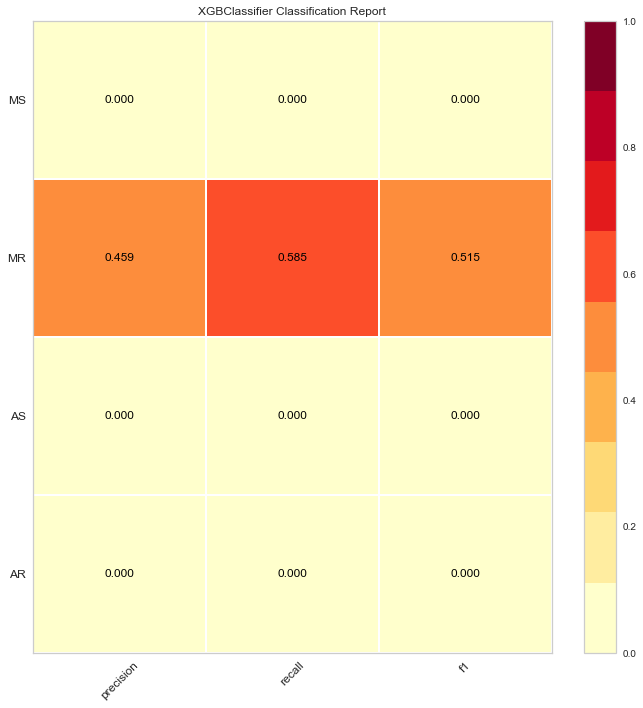

In [34]:
report = ClassificationReport(model, size=(700, 720), classes=classes)

report.score(features, y.disease1)
c = report.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


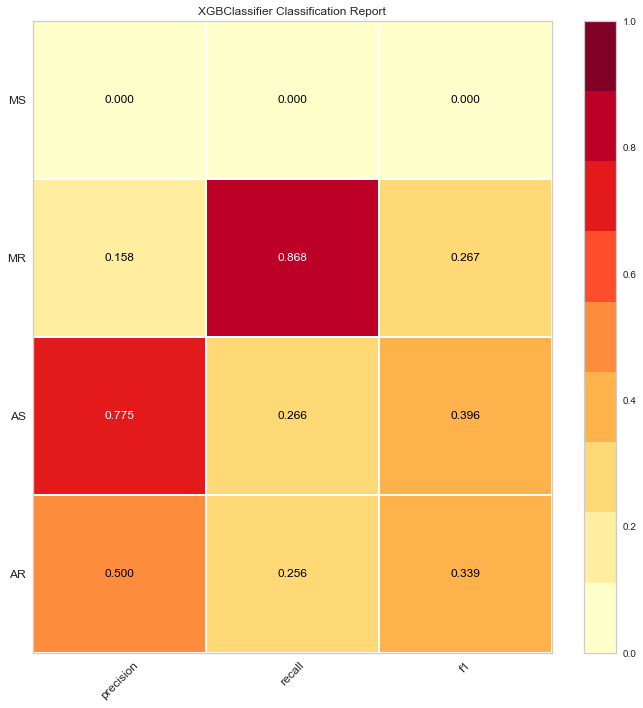

In [35]:
report = ClassificationReport(model, size=(700, 720), classes=classes)

report.score(features, y.disease2)
c = report.poof()

In [36]:
rocauc = ROCAUC(model, size=(700, 700), classes=classes)

rocauc.fit(X_train, y_train)       
rocauc.score(features, y.disease1)  
r = rocauc.poof()

ValueError: Found input variables with inconsistent numbers of samples: [981, 1308]

<Figure size 700x700 with 0 Axes>